In [1]:
import pandas as pd
import numpy as np
import datetime
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler
import os
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
import shap
from os import listdir
from os.path import isfile, join

In [2]:
import tensorflow as tf
from keras import layers
from keras import models


In [3]:
work_dir = os.getcwd()+'\\train\\'
data = pd.read_excel(work_dir+'train.xlsx', header=5, engine='openpyxl' )
data.head()

,год,неделя,Начало нед,"Продажи, рубли","Продажи, упаковки","Продажи, рубли.1","раствор 0.01 % 150 мл N1, руб","раствор 0.01 % 50 мл N1, руб","раствор 0.01 % 500 мл N1, руб","раствор 0.01 % 150 мл N1, упаковки",...,Итого.11,"ТВ, trp\n(Ж 30-60 ВС).12","ТВ, охват 5+\n(Ж 30-60 ВС).12","ТВ, рубли.12","Диджитал, руб.12","ТВ спонсорство, рубли.12","OOH, рубли.12","Радио, рубли.13",Итого.12,Unnamed: 147
0,2019.0,1,2018-12-31,4.153557e+07,114621.15,0.0,0.0,0.0,0.0,0.0,...,1.183425e+07,207.903106,15.3615,9085528.010323,0.0,0.0,0.0,0.0,9.085528e+06,NaN
1,NaN,2,2019-01-07,5.122229e+07,141523.20,0.0,0.0,0.0,0.0,0.0,...,1.399653e+07,317.467542,25.5255,10599782.67871,0.0,0.0,0.0,0.0,1.059978e+07,NaN
2,NaN,3,2019-01-14,5.712735e+07,157926.30,0.0,0.0,0.0,0.0,0.0,...,1.146629e+07,192.816682,13.9125,10599782.67871,0.0,0.0,0.0,0.0,1.059978e+07,NaN
3,NaN,4,2019-01-21,6.304099e+07,173746.65,0.0,0.0,0.0,0.0,0.0,...,1.076463e+07,138.371621,8.0535,10599782.67871,0.0,0.0,0.0,0.0,1.059978e+07,NaN
4,NaN,5,2019-01-28,6.733689e+07,185551.80,0.0,0.0,0.0,0.0,0.0,...,1.098497e+07,286.984113,24.2235,12893092.405548,0.0,0.0,0.0,0.0,1.289309e+07,NaN


In [4]:
data.to_csv(work_dir+'train.csv', index=False)

In [5]:
data.columns

Index(['год', 'неделя', 'Начало нед', 'Продажи, рубли', 'Продажи, упаковки',
       'Продажи, рубли.1', 'раствор 0.01 % 150 мл N1, руб',
       'раствор  0.01 % 50 мл N1, руб', 'раствор 0.01 % 500 мл N1, руб',
       'раствор 0.01 % 150 мл N1, упаковки',
       ...
       'Итого.11', 'ТВ, trp\n(Ж 30-60 ВС).12', 'ТВ, охват 5+\n(Ж 30-60 ВС).12',
       'ТВ, рубли.12', 'Диджитал, руб.12', 'ТВ спонсорство, рубли.12',
       'OOH, рубли.12', 'Радио, рубли.13', 'Итого.12', 'Unnamed: 147'],
      dtype='object', length=148)

In [6]:
df = data.drop(data.columns[5:12], axis = 1)
df = df.drop(df.columns[30:], axis = 1)
df

,год,неделя,Начало нед,"Продажи, рубли","Продажи, упаковки",Дистрибуция Мирамистин,Выписки,Статистика заболеваемости,Индекс цены,Развитие Дженериков \n(средняя дистрибуция),...,"(4)\nТВ, trp\n(Ж 30-60 ВС)","(4)\nТВ, рубли","(4)\nТВ, охват 5+\n(Ж 30-60 ВС)","(тотал)\nТВ, trp\n(Ж 30-60 ВС)","(тотал)\nТВ, рубли","(тотал)\nТВ, охват 5+\n(Ж 30-60 ВС)","Диджитал, рубли","Радио, рубли","Радио, количество выходов",Запросы Wordstat
0,2019.0,1,2018-12-31,4.153557e+07,114621.15,0.92107,99698.595433,508956.0,1.54132,0.0,...,0.0,0.0,0.0,0.000000,,0.0000,1057612.5,0.0,0.0,76854.75
1,NaN,2,2019-01-07,5.122229e+07,141523.20,0.92107,99698.595433,804825.0,1.54132,0.0,...,0.0,0.0,0.0,7.295625,5728287.707303,0.0000,844452.0,0.0,0.0,89113.50
2,NaN,3,2019-01-14,5.712735e+07,157926.30,0.92107,99698.595433,993384.0,1.54132,0.0,...,0.0,0.0,0.0,404.324055,6683002.325187,32.8020,1235682.0,0.0,0.0,96066.60
3,NaN,4,2019-01-21,6.304099e+07,173746.65,0.92107,99698.595433,1186542.0,1.54132,0.0,...,0.0,0.0,0.0,310.839867,6683002.325187,25.5570,538272.0,0.0,0.0,99189.30
4,NaN,5,2019-01-28,6.733689e+07,185551.80,0.92107,99698.595433,1454817.0,1.54132,0.0,...,0.0,0.0,0.0,319.546485,6683002.325187,26.7855,0.0,0.0,0.0,108418.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,NaN,49,2024-12-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.000000,0,0.0000,0.0,0.0,0.0,NaN
310,NaN,50,2024-12-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.000000,0,0.0000,0.0,0.0,0.0,NaN
311,NaN,51,2024-12-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.000000,0,0.0000,0.0,0.0,0.0,NaN
312,NaN,52,2024-12-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.000000,0,0.0000,0.0,0.0,0.0,NaN


In [7]:
df['год'] = df['год'].fillna(0)
for i in range(1, len(df)):
    if df.loc[i, 'год'] ==0:
        df.loc[i, 'год'] =  df.loc[i-1, 'год']
try:
    df = df.drop(['Выписки '], axis = 1)
    df = df.drop(['Продажи, упаковки'], axis = 1)
    
except:
    l=1
df = df.fillna(0)
df = df[df['Продажи, рубли']!=0]

In [8]:
df1 = df.fillna(0).copy()

In [9]:
df = df.drop(['Начало нед'], axis = 1)
df

,год,неделя,"Продажи, рубли",Дистрибуция Мирамистин,Статистика заболеваемости,Индекс цены,Развитие Дженериков \n(средняя дистрибуция),Развитие Дженериков \n(кол-во брендов),"(1)\nТВ, trp\n(Ж 30-60 ВС)","(1)\nТВ, рубли",...,"(4)\nТВ, trp\n(Ж 30-60 ВС)","(4)\nТВ, рубли","(4)\nТВ, охват 5+\n(Ж 30-60 ВС)","(тотал)\nТВ, trp\n(Ж 30-60 ВС)","(тотал)\nТВ, рубли","(тотал)\nТВ, охват 5+\n(Ж 30-60 ВС)","Диджитал, рубли","Радио, рубли","Радио, количество выходов",Запросы Wordstat
0,2019.0,1,4.153557e+07,0.92107,508956.0,1.541320,0.000000,0.00,0,0,...,0.0,0.0,0.0,0.000000,,0.0000,1057612.50,0.000000e+00,0.0,76854.75
1,2019.0,2,5.122229e+07,0.92107,804825.0,1.541320,0.000000,0.00,7.295625,5455512.102194,...,0.0,0.0,0.0,7.295625,5728287.707303,0.0000,844452.00,0.000000e+00,0.0,89113.50
2,2019.0,3,5.712735e+07,0.92107,993384.0,1.541320,0.000000,0.00,404.324055,6364764.119226,...,0.0,0.0,0.0,404.324055,6683002.325187,32.8020,1235682.00,0.000000e+00,0.0,96066.60
3,2019.0,4,6.304099e+07,0.92107,1186542.0,1.541320,0.000000,0.00,310.839867,6364764.119226,...,0.0,0.0,0.0,310.839867,6683002.325187,25.5570,538272.00,0.000000e+00,0.0,99189.30
4,2019.0,5,6.733689e+07,0.92107,1454817.0,1.541320,0.000000,0.00,319.546485,6364764.119226,...,0.0,0.0,0.0,319.546485,6683002.325187,26.7855,0.00,0.000000e+00,0.0,108418.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,2023.0,31,5.693151e+07,0.99750,367920.0,1.542399,0.063335,15.75,0,0,...,0.0,0.0,0.0,0.000000,0,0.0000,3278646.00,0.000000e+00,0.0,57033.90
240,2023.0,32,5.988151e+07,0.99750,390915.0,1.566483,0.070484,15.75,0,0,...,0.0,0.0,0.0,0.000000,0,0.0000,2701755.00,0.000000e+00,0.0,56645.40
241,2023.0,33,6.111218e+07,0.99750,398580.0,1.566483,0.070484,15.75,0,0,...,0.0,0.0,0.0,0.000000,0,0.0000,408240.00,0.000000e+00,0.0,59285.10
242,2023.0,34,6.159493e+07,0.99750,429240.0,1.566483,0.070484,15.75,0,0,...,0.0,0.0,0.0,0.000000,0,0.0000,309723.75,0.000000e+00,0.0,59583.30


In [10]:
df = df1.copy()
df

,год,неделя,Начало нед,"Продажи, рубли",Дистрибуция Мирамистин,Статистика заболеваемости,Индекс цены,Развитие Дженериков \n(средняя дистрибуция),Развитие Дженериков \n(кол-во брендов),"(1)\nТВ, trp\n(Ж 30-60 ВС)",...,"(4)\nТВ, trp\n(Ж 30-60 ВС)","(4)\nТВ, рубли","(4)\nТВ, охват 5+\n(Ж 30-60 ВС)","(тотал)\nТВ, trp\n(Ж 30-60 ВС)","(тотал)\nТВ, рубли","(тотал)\nТВ, охват 5+\n(Ж 30-60 ВС)","Диджитал, рубли","Радио, рубли","Радио, количество выходов",Запросы Wordstat
0,2019.0,1,2018-12-31,4.153557e+07,0.92107,508956.0,1.541320,0.000000,0.00,0,...,0.0,0.0,0.0,0.000000,,0.0000,1057612.50,0.000000e+00,0.0,76854.75
1,2019.0,2,2019-01-07,5.122229e+07,0.92107,804825.0,1.541320,0.000000,0.00,7.295625,...,0.0,0.0,0.0,7.295625,5728287.707303,0.0000,844452.00,0.000000e+00,0.0,89113.50
2,2019.0,3,2019-01-14,5.712735e+07,0.92107,993384.0,1.541320,0.000000,0.00,404.324055,...,0.0,0.0,0.0,404.324055,6683002.325187,32.8020,1235682.00,0.000000e+00,0.0,96066.60
3,2019.0,4,2019-01-21,6.304099e+07,0.92107,1186542.0,1.541320,0.000000,0.00,310.839867,...,0.0,0.0,0.0,310.839867,6683002.325187,25.5570,538272.00,0.000000e+00,0.0,99189.30
4,2019.0,5,2019-01-28,6.733689e+07,0.92107,1454817.0,1.541320,0.000000,0.00,319.546485,...,0.0,0.0,0.0,319.546485,6683002.325187,26.7855,0.00,0.000000e+00,0.0,108418.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,2023.0,31,2023-07-31,5.693151e+07,0.99750,367920.0,1.542399,0.063335,15.75,0,...,0.0,0.0,0.0,0.000000,0,0.0000,3278646.00,0.000000e+00,0.0,57033.90
240,2023.0,32,2023-08-07,5.988151e+07,0.99750,390915.0,1.566483,0.070484,15.75,0,...,0.0,0.0,0.0,0.000000,0,0.0000,2701755.00,0.000000e+00,0.0,56645.40
241,2023.0,33,2023-08-14,6.111218e+07,0.99750,398580.0,1.566483,0.070484,15.75,0,...,0.0,0.0,0.0,0.000000,0,0.0000,408240.00,0.000000e+00,0.0,59285.10
242,2023.0,34,2023-08-21,6.159493e+07,0.99750,429240.0,1.566483,0.070484,15.75,0,...,0.0,0.0,0.0,0.000000,0,0.0000,309723.75,0.000000e+00,0.0,59583.30


In [11]:

def select_period(period, pred_depth, df):
    n=0
    period = period
    columns = ['Статистика заболеваемости', '(1)\nТВ, trp\n(Ж 30-60 ВС)', '(1)\nТВ, рубли',
           '(1)\nТВ, охват 5+\n(Ж 30-60 ВС)', '(2)\nТВ, trp\n(Ж 30-60 ВС)',
           '(2)\nТВ, рубли', '(2)\nТВ, охват 5+\n(Ж 30-60 ВС)',
           '(3)\nТВ, trp\n(Ж 30-60 ВС)', '(3)\nТВ, рубли',
           '(3)\nТВ, охват 5+\n(Ж 30-60 ВС)', '(4)\nТВ, trp\n(Ж 30-60 ВС)', '(4)\nТВ, рубли',
           '(4)\nТВ, охват 5+\n(Ж 30-60 ВС)', '(тотал)\nТВ, trp\n(Ж 30-60 ВС)',
           '(тотал)\nТВ, рубли', '(тотал)\nТВ, охват 5+\n(Ж 30-60 ВС)',
           'Диджитал, рубли', 'Радио, рубли', 'Радио, количество выходов ',
           'Запросы Wordstat'] #'Продажи, рубли', 
    (rows,cols) = df.shape
    for i in range(rows):
        for j in range(cols):
            if df.iloc[i,j]==' ':
                df.iloc[i,j] = 0
    for j in range(period, len(df)-pred_depth):
        for column in columns:
            for i in range(1, period+1):
                try:
                    df.loc[j,column+' '+ str(i)] = df.loc[j, column]-df.loc[j-i, column]
                except:
                    n+=1
                    if type(df.loc[j, column])==str:
                        df.loc[j, column]=0
                    if type(df.loc[j-1, column])==str:
                        df.loc[j-i, column]=0
                    df.loc[j,column+' '+ str(i)] = df.loc[j, column]-df.loc[j-i, column]
        for k in range(1, pred_depth+1):
            df.loc[j,'Продажи, рубли'+' ' + str(k)] = df.loc[j+k,'Продажи, рубли']
            
    df = df.iloc[period:len(df)-pred_depth,:]
    
    
    return df

In [12]:
pred_depth = 10
period = 10
df_tmp = select_period(period, pred_depth, df1.copy())
for i in range(1,pred_depth+1):
    #df_tmp = select_period(i, pred_depth, df1.copy())
    y=df_tmp['Продажи, рубли'+' ' + str(i)]
    X = df_tmp.drop(['год', 'Начало нед', 'Продажи, рубли'], axis = 1)
    for k in range(1, pred_depth+1):
        X = X.drop(['Продажи, рубли '+ str(k)], axis = 1)
    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    n=int(len(X)*.8//1)
    X_train = X.iloc[:n,:]
    X_test = X.iloc[n:,:]
    y_train = y[:n]
    y_test = y[n:]
    regr = RandomForestRegressor(max_depth=5, random_state=0)
    regr.fit(X_train, y_train)
    y_pred = regr.predict(X_test)
    #mean_absolute_error(y_test, y_pred, multioutput='raw_values') 
    print('depth - ', i)
    print('mape - ', mean_absolute_percentage_error(y_test, y_pred))
    print('rsq - ', r2_score(y_test, y_pred))

C:\Users\andre\AppData\Local\Temp\ipykernel_11380\2409173603.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df.loc[j,column+' '+ str(i)] = df.loc[j, column]-df.loc[j-i, column]
C:\Users\andre\AppData\Local\Temp\ipykernel_11380\2409173603.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df.loc[j,column+' '+ str(i)] = df.loc[j, column]-df.loc[j-i, column]
C:\Users\andre\AppData\Local\Temp\ipykernel_11380\2409173603.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.in

C:\Users\andre\AppData\Local\Temp\ipykernel_11380\4121326425.py:14: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_train = y[:n]
C:\Users\andre\AppData\Local\Temp\ipykernel_11380\4121326425.py:15: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_test = y[n:]


depth -  1
mape -  0.15107697282447263
rsq -  -0.22711991071248505


C:\Users\andre\AppData\Local\Temp\ipykernel_11380\4121326425.py:14: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_train = y[:n]
C:\Users\andre\AppData\Local\Temp\ipykernel_11380\4121326425.py:15: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_test = y[n:]


depth -  2
mape -  0.1580594355039873
rsq -  -0.339709885104007


C:\Users\andre\AppData\Local\Temp\ipykernel_11380\4121326425.py:14: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_train = y[:n]
C:\Users\andre\AppData\Local\Temp\ipykernel_11380\4121326425.py:15: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_test = y[n:]


depth -  3
mape -  0.1765838730732914
rsq -  -0.6162794411471544


C:\Users\andre\AppData\Local\Temp\ipykernel_11380\4121326425.py:14: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_train = y[:n]
C:\Users\andre\AppData\Local\Temp\ipykernel_11380\4121326425.py:15: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_test = y[n:]


depth -  4
mape -  0.1530440184199203
rsq -  -0.2785619277730762


C:\Users\andre\AppData\Local\Temp\ipykernel_11380\4121326425.py:14: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_train = y[:n]
C:\Users\andre\AppData\Local\Temp\ipykernel_11380\4121326425.py:15: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_test = y[n:]


depth -  5
mape -  0.15997717794223068
rsq -  -0.3394821570317015


C:\Users\andre\AppData\Local\Temp\ipykernel_11380\4121326425.py:14: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_train = y[:n]
C:\Users\andre\AppData\Local\Temp\ipykernel_11380\4121326425.py:15: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_test = y[n:]


depth -  6
mape -  0.15197841675928056
rsq -  -0.4404984922657482


C:\Users\andre\AppData\Local\Temp\ipykernel_11380\4121326425.py:14: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_train = y[:n]
C:\Users\andre\AppData\Local\Temp\ipykernel_11380\4121326425.py:15: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_test = y[n:]


depth -  7
mape -  0.18104018036627945
rsq -  -1.1641495012603653


C:\Users\andre\AppData\Local\Temp\ipykernel_11380\4121326425.py:14: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_train = y[:n]
C:\Users\andre\AppData\Local\Temp\ipykernel_11380\4121326425.py:15: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_test = y[n:]


depth -  8
mape -  0.17299795833722242
rsq -  -0.810612965462586


C:\Users\andre\AppData\Local\Temp\ipykernel_11380\4121326425.py:14: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_train = y[:n]
C:\Users\andre\AppData\Local\Temp\ipykernel_11380\4121326425.py:15: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_test = y[n:]


depth -  9
mape -  0.18878699795879542
rsq -  -0.9371757821264795


C:\Users\andre\AppData\Local\Temp\ipykernel_11380\4121326425.py:14: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_train = y[:n]
C:\Users\andre\AppData\Local\Temp\ipykernel_11380\4121326425.py:15: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_test = y[n:]


depth -  10
mape -  0.21347036865805116
rsq -  -1.339631155512814


C:\Users\andre\AppData\Local\Temp\ipykernel_11380\2409173603.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df.loc[j,column+' '+ str(i)] = df.loc[j, column]-df.loc[j-i, column]
C:\Users\andre\AppData\Local\Temp\ipykernel_11380\2409173603.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df.loc[j,column+' '+ str(i)] = df.loc[j, column]-df.loc[j-i, column]
C:\Users\andre\AppData\Local\Temp\ipykernel_11380\2409173603.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.in

C:\Users\andre\AppData\Local\Temp\ipykernel_11380\2835818170.py:14: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_train = y[:n]
C:\Users\andre\AppData\Local\Temp\ipykernel_11380\2835818170.py:15: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_test = y[n:]


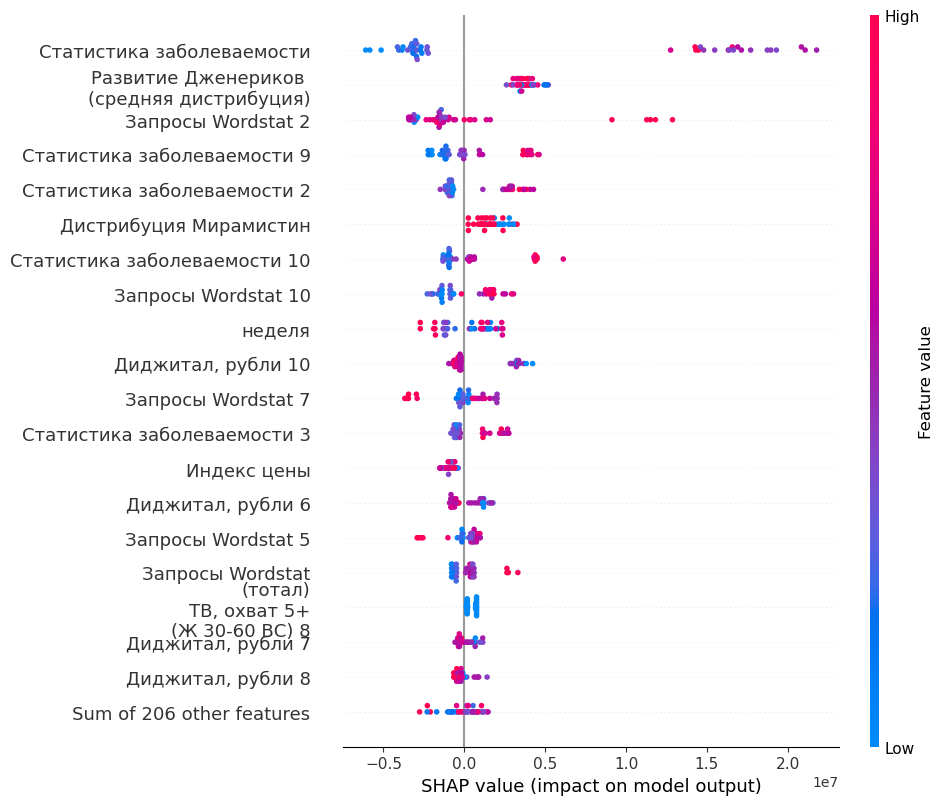

depth -  1
mape -  0.15084231698727113
rsq -  -0.22254844303324894


C:\Users\andre\AppData\Local\Temp\ipykernel_11380\2835818170.py:14: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_train = y[:n]
C:\Users\andre\AppData\Local\Temp\ipykernel_11380\2835818170.py:15: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_test = y[n:]


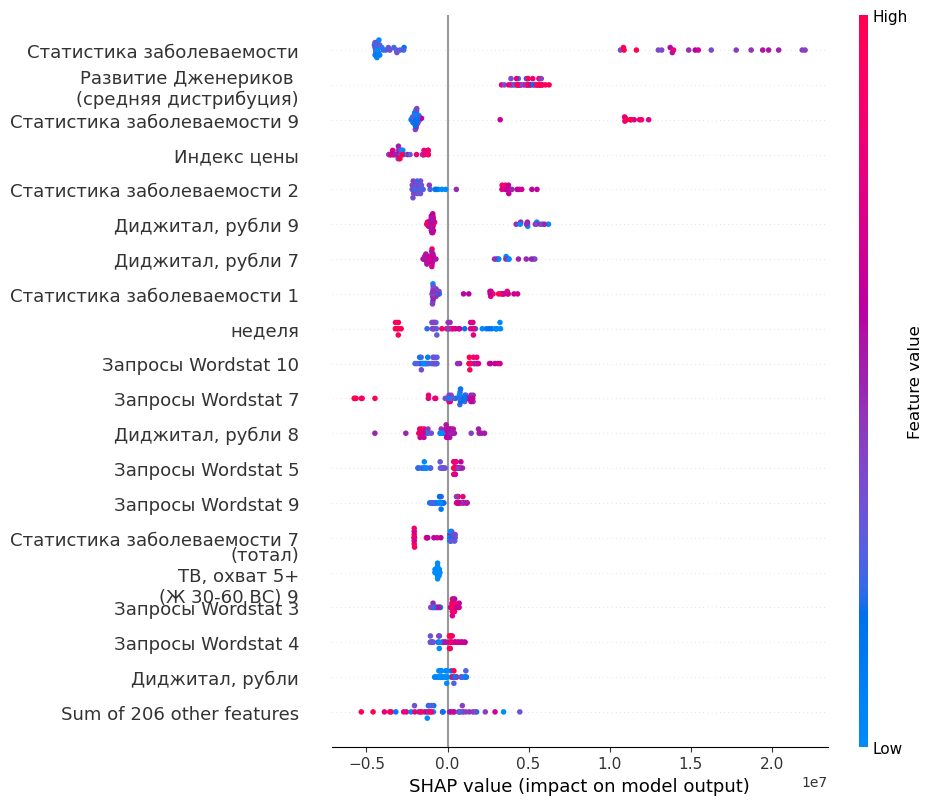

depth -  2
mape -  0.141090806822211
rsq -  -0.05292505659381819


C:\Users\andre\AppData\Local\Temp\ipykernel_11380\2835818170.py:14: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_train = y[:n]
C:\Users\andre\AppData\Local\Temp\ipykernel_11380\2835818170.py:15: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_test = y[n:]


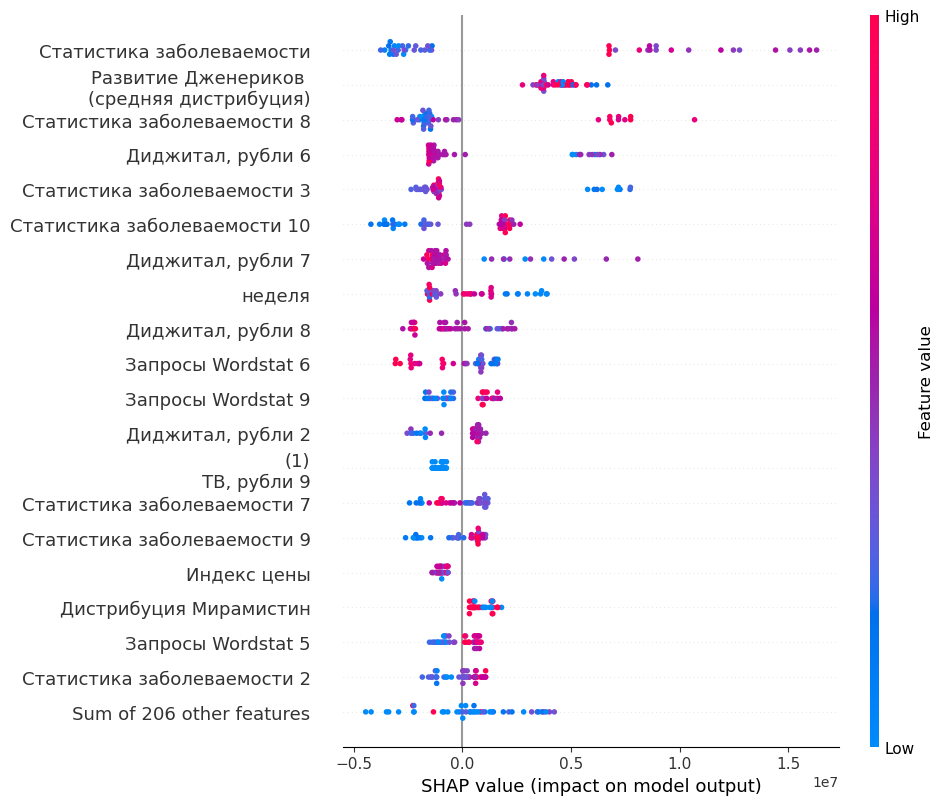

depth -  3
mape -  0.16190314582216073
rsq -  -0.17288387605498645


C:\Users\andre\AppData\Local\Temp\ipykernel_11380\2835818170.py:14: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_train = y[:n]
C:\Users\andre\AppData\Local\Temp\ipykernel_11380\2835818170.py:15: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_test = y[n:]


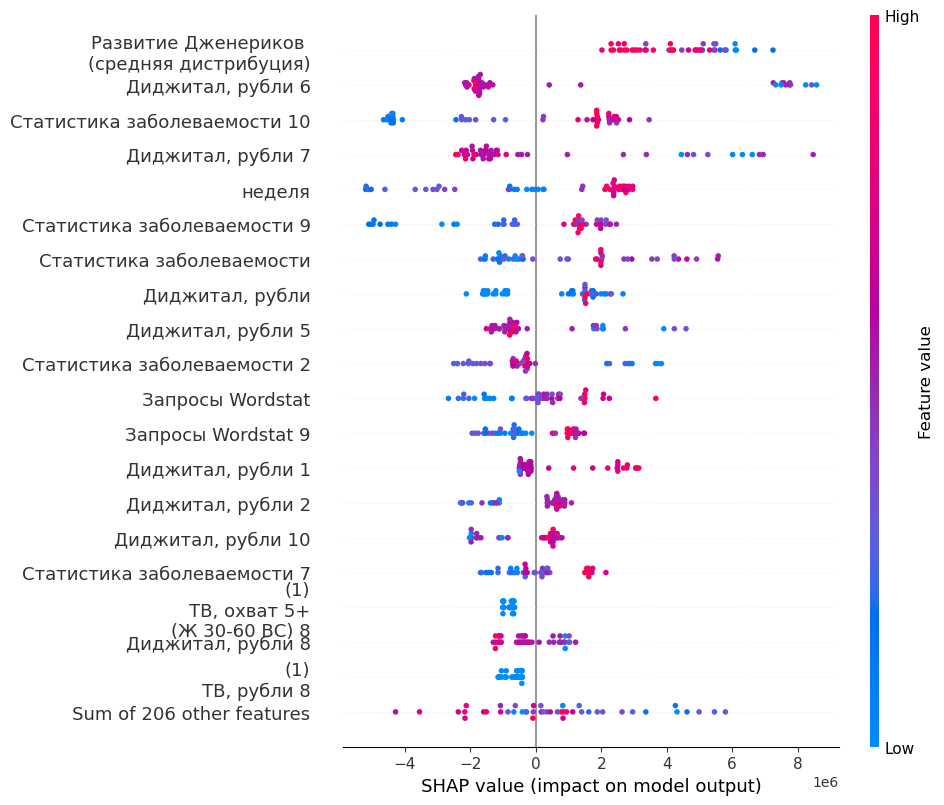

depth -  4
mape -  0.13359647479202172
rsq -  0.15516752387333965


C:\Users\andre\AppData\Local\Temp\ipykernel_11380\2835818170.py:14: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_train = y[:n]
C:\Users\andre\AppData\Local\Temp\ipykernel_11380\2835818170.py:15: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_test = y[n:]


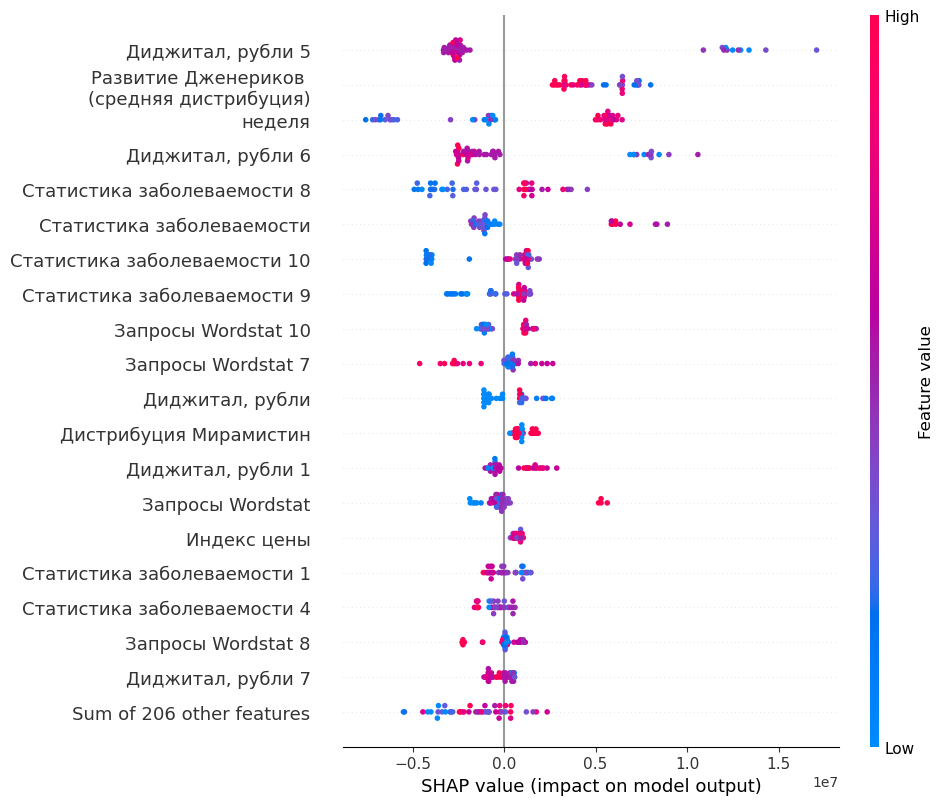

depth -  5
mape -  0.15738313259851275
rsq -  -0.28181605617689276


C:\Users\andre\AppData\Local\Temp\ipykernel_11380\2835818170.py:14: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_train = y[:n]
C:\Users\andre\AppData\Local\Temp\ipykernel_11380\2835818170.py:15: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_test = y[n:]


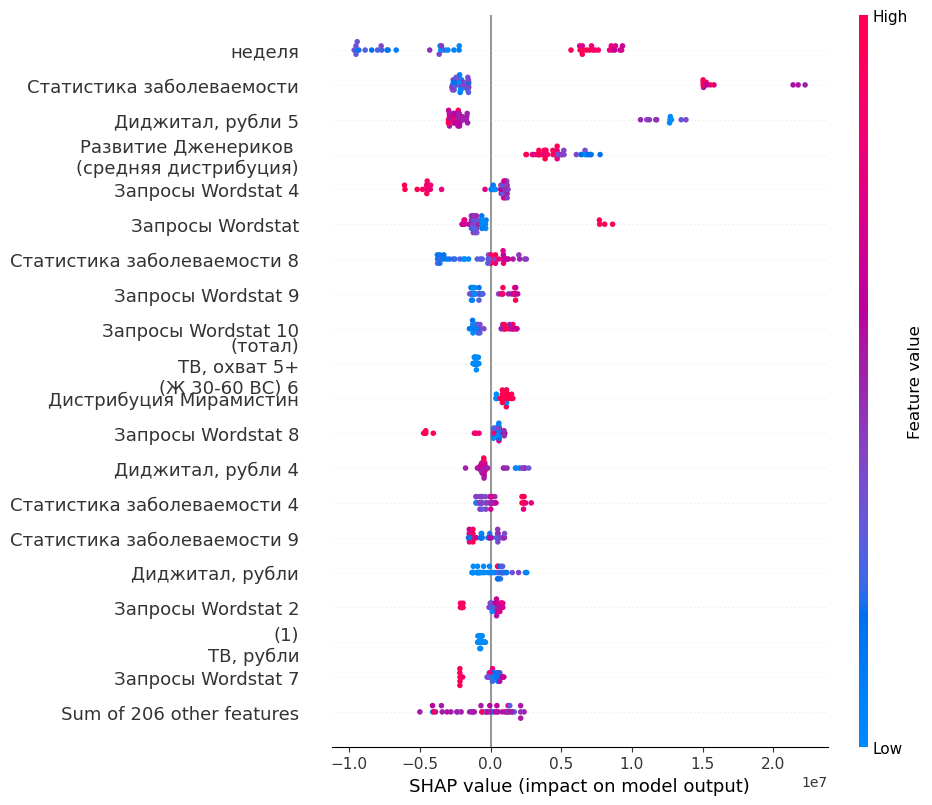

depth -  6
mape -  0.14714319519751562
rsq -  -0.256738747860614


C:\Users\andre\AppData\Local\Temp\ipykernel_11380\2835818170.py:14: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_train = y[:n]
C:\Users\andre\AppData\Local\Temp\ipykernel_11380\2835818170.py:15: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_test = y[n:]


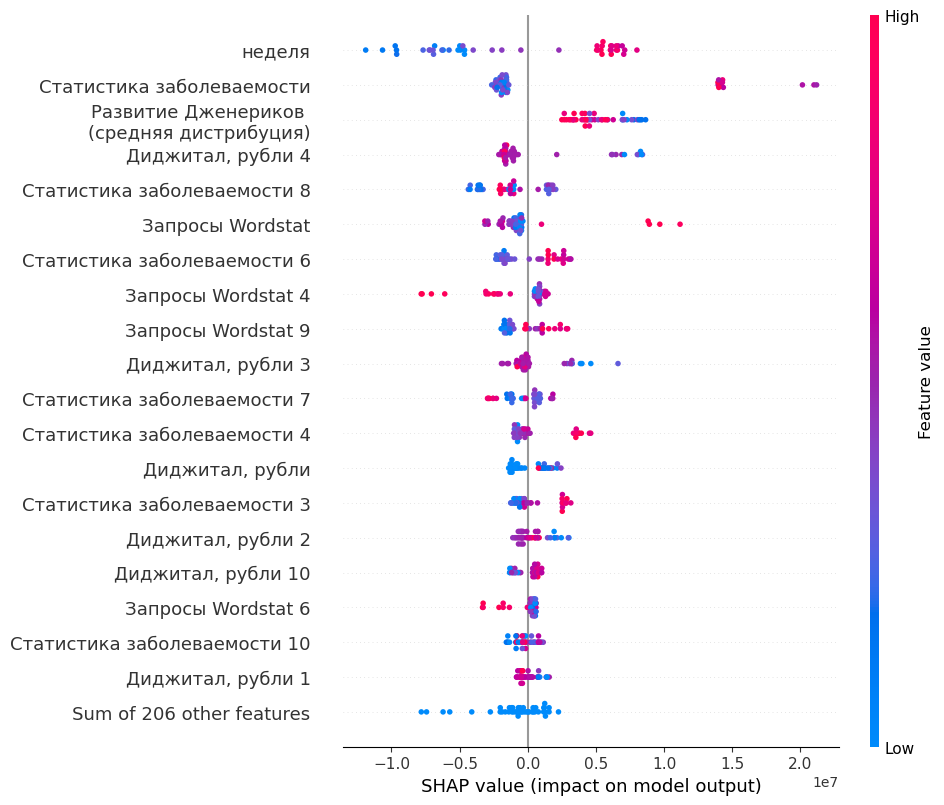

depth -  7
mape -  0.17188156387870318
rsq -  -0.8084436423374055


C:\Users\andre\AppData\Local\Temp\ipykernel_11380\2835818170.py:14: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_train = y[:n]
C:\Users\andre\AppData\Local\Temp\ipykernel_11380\2835818170.py:15: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_test = y[n:]


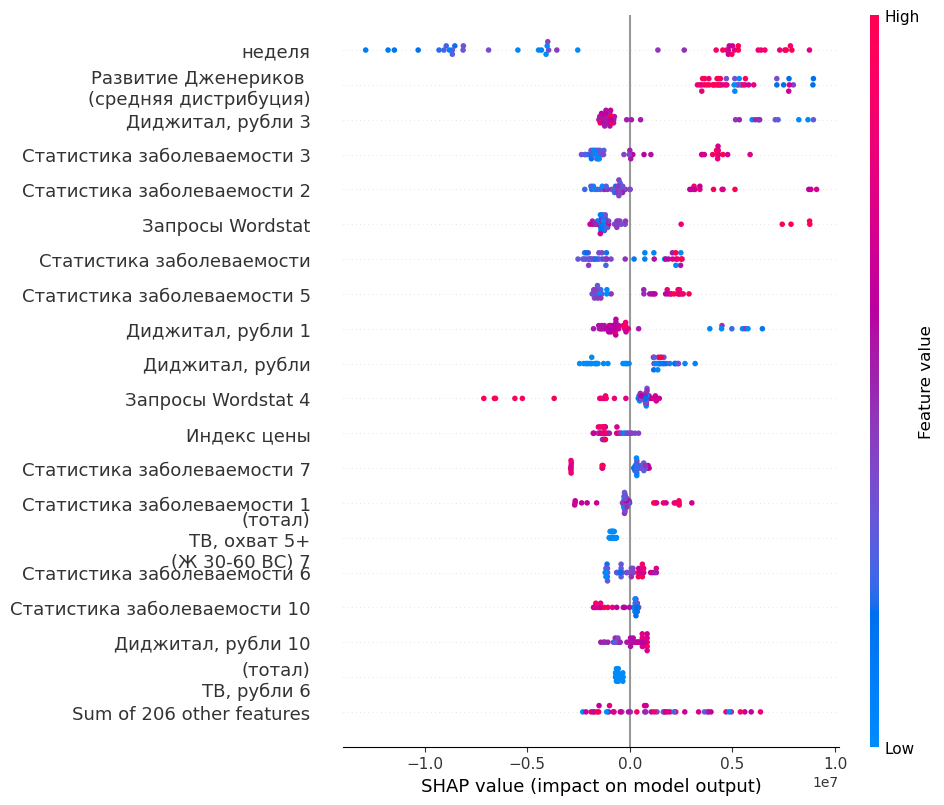

depth -  8
mape -  0.17057333804083147
rsq -  -0.6353875310257062


C:\Users\andre\AppData\Local\Temp\ipykernel_11380\2835818170.py:14: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_train = y[:n]
C:\Users\andre\AppData\Local\Temp\ipykernel_11380\2835818170.py:15: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_test = y[n:]


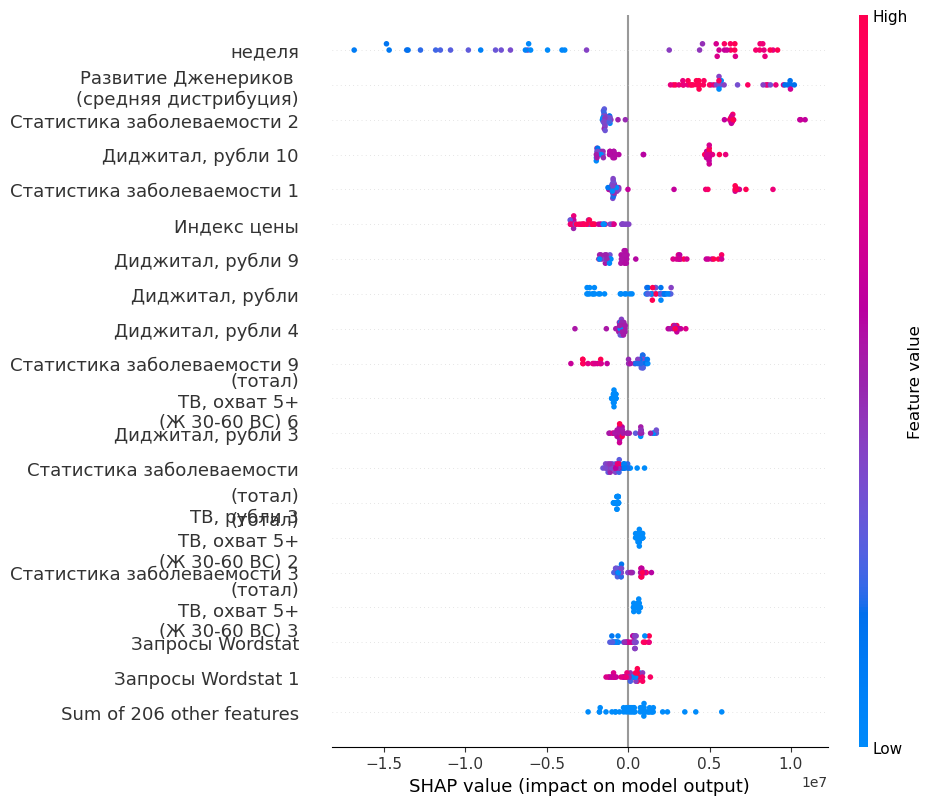

depth -  9
mape -  0.19789232989153563
rsq -  -1.1863404922864675


C:\Users\andre\AppData\Local\Temp\ipykernel_11380\2835818170.py:14: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_train = y[:n]
C:\Users\andre\AppData\Local\Temp\ipykernel_11380\2835818170.py:15: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_test = y[n:]


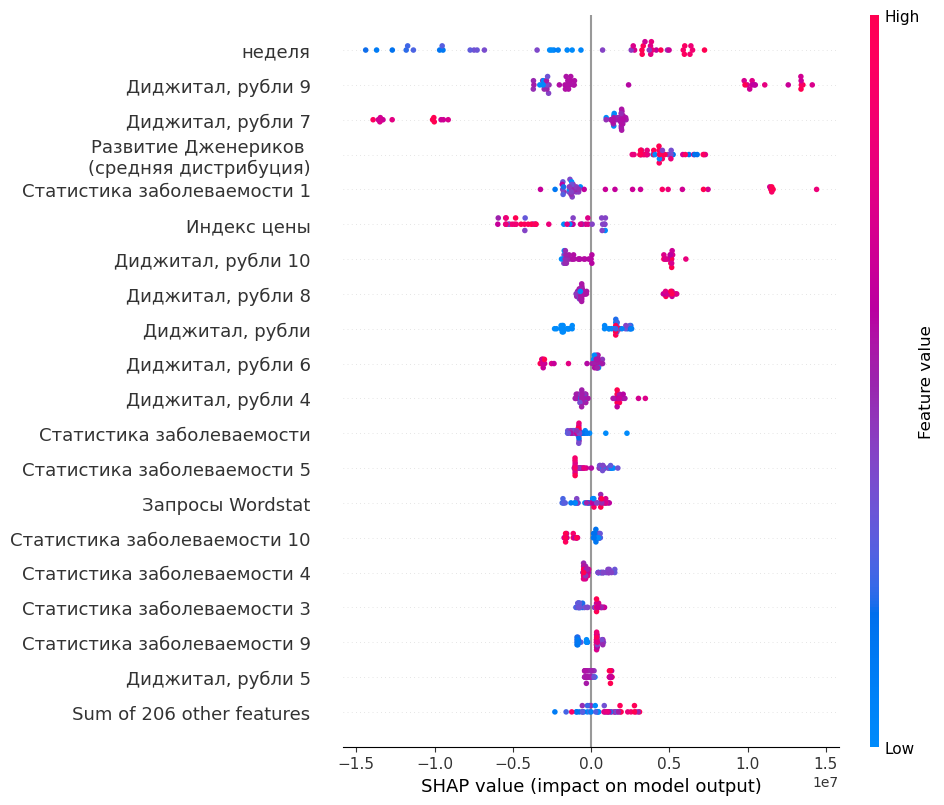

depth -  10
mape -  0.19439763480395184
rsq -  -1.0224558691649572


In [13]:
pred_depth = 10
period = 10
df_tmp = select_period(period, pred_depth, df1.copy())
for i in range(1, pred_depth+1): #pred_depth+1
    #df_tmp = select_period(i, pred_depth, df1.copy())
    y=df_tmp['Продажи, рубли'+' ' + str(i)]
    X = df_tmp.drop(['год', 'Начало нед', 'Продажи, рубли'], axis = 1)
    for k in range(1, pred_depth+1):
        X = X.drop(['Продажи, рубли '+ str(k)], axis = 1)
    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    n=int(len(X)*.8//1)
    X_train = X.iloc[:n,:]
    X_test = X.iloc[n:,:]
    y_train = y[:n]
    y_test = y[n:]
    est = HistGradientBoostingRegressor()
    est.fit(X_train, y_train)
    y_pred = est.predict(X_test)
    explainer = shap.Explainer(
        est, X_train.astype(float)) #, feature_names=vectorizer.get_feature_names_out()
    shap_values = explainer(X_test)
    shap.plots.beeswarm(shap_values, max_display=20)
    #mean_absolute_error(y_test, y_pred, multioutput='raw_values') 
    print('depth - ', i)
    print('mape - ', mean_absolute_percentage_error(y_test, y_pred))
    print('rsq - ', r2_score(y_test, y_pred))

In [145]:
y=df['Продажи, рубли']
X = df.drop(['год', 'Начало нед', 'Продажи, рубли'], axis = 1)

In [146]:
df.columns[df.isin([' ']).any()]

Index([], dtype='object')

In [147]:
X

,неделя,Дистрибуция Мирамистин,Статистика заболеваемости,Индекс цены,Развитие Дженериков \n(средняя дистрибуция),Развитие Дженериков \n(кол-во брендов),"(1)\nТВ, trp\n(Ж 30-60 ВС)","(1)\nТВ, рубли","(1)\nТВ, охват 5+\n(Ж 30-60 ВС)","(2)\nТВ, trp\n(Ж 30-60 ВС)",...,"Радио, количество выходов 5","Радио, количество выходов 6","Радио, количество выходов 7","Радио, количество выходов 8","Радио, количество выходов 9",Запросы Wordstat 5,Запросы Wordstat 6,Запросы Wordstat 7,Запросы Wordstat 8,Запросы Wordstat 9
0,1,0.92107,508956.0,1.541320,0.000000,0.00,0.000000,0.000000e+00,0.0000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00
1,2,0.92107,804825.0,1.541320,0.000000,0.00,7.295625,5.455512e+06,0.0000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00
2,3,0.92107,993384.0,1.541320,0.000000,0.00,404.324055,6.364764e+06,32.8020,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00
3,4,0.92107,1186542.0,1.541320,0.000000,0.00,310.839867,6.364764e+06,25.5570,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00
4,5,0.92107,1454817.0,1.541320,0.000000,0.00,319.546485,6.364764e+06,26.7855,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,31,0.99750,367920.0,1.542399,0.063335,15.75,0.000000,0.000000e+00,0.0000,0.0,...,0.0,0.0,0.0,0.0,0.0,77.70,-7766.85,-10799.25,-9516.15,-6393.45
240,32,0.99750,390915.0,1.566483,0.070484,15.75,0.000000,0.000000e+00,0.0000,0.0,...,0.0,0.0,0.0,0.0,0.0,198.45,-310.80,-8155.35,-11187.75,-9904.65
241,33,0.99750,398580.0,1.566483,0.070484,15.75,0.000000,0.000000e+00,0.0000,0.0,...,0.0,0.0,0.0,0.0,0.0,3810.45,2838.15,2328.90,-5515.65,-8548.05
242,34,0.99750,429240.0,1.566483,0.070484,15.75,0.000000,0.000000e+00,0.0000,0.0,...,0.0,0.0,0.0,0.0,0.0,1657.95,4108.65,3136.35,2627.10,-5217.45


In [17]:
df = df.drop(['Начало нед'], axis = 1)
df

,год,неделя,"Продажи, рубли",Дистрибуция Мирамистин,Статистика заболеваемости,Индекс цены,Развитие Дженериков \n(средняя дистрибуция),Развитие Дженериков \n(кол-во брендов),"(1)\nТВ, trp\n(Ж 30-60 ВС)","(1)\nТВ, рубли",...,"(4)\nТВ, trp\n(Ж 30-60 ВС)","(4)\nТВ, рубли","(4)\nТВ, охват 5+\n(Ж 30-60 ВС)","(тотал)\nТВ, trp\n(Ж 30-60 ВС)","(тотал)\nТВ, рубли","(тотал)\nТВ, охват 5+\n(Ж 30-60 ВС)","Диджитал, рубли","Радио, рубли","Радио, количество выходов",Запросы Wordstat
0,2019.0,1,4.153557e+07,0.92107,508956.0,1.541320,0.000000,0.00,0,0,...,0.0,0.0,0.0,0.000000,,0.0000,1057612.50,0.000000e+00,0.0,76854.75
1,2019.0,2,5.122229e+07,0.92107,804825.0,1.541320,0.000000,0.00,7.295625,5455512.102194,...,0.0,0.0,0.0,7.295625,5728287.707303,0.0000,844452.00,0.000000e+00,0.0,89113.50
2,2019.0,3,5.712735e+07,0.92107,993384.0,1.541320,0.000000,0.00,404.324055,6364764.119226,...,0.0,0.0,0.0,404.324055,6683002.325187,32.8020,1235682.00,0.000000e+00,0.0,96066.60
3,2019.0,4,6.304099e+07,0.92107,1186542.0,1.541320,0.000000,0.00,310.839867,6364764.119226,...,0.0,0.0,0.0,310.839867,6683002.325187,25.5570,538272.00,0.000000e+00,0.0,99189.30
4,2019.0,5,6.733689e+07,0.92107,1454817.0,1.541320,0.000000,0.00,319.546485,6364764.119226,...,0.0,0.0,0.0,319.546485,6683002.325187,26.7855,0.00,0.000000e+00,0.0,108418.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,2023.0,31,5.693151e+07,0.99750,367920.0,1.542399,0.063335,15.75,0,0,...,0.0,0.0,0.0,0.000000,0,0.0000,3278646.00,0.000000e+00,0.0,57033.90
240,2023.0,32,5.988151e+07,0.99750,390915.0,1.566483,0.070484,15.75,0,0,...,0.0,0.0,0.0,0.000000,0,0.0000,2701755.00,0.000000e+00,0.0,56645.40
241,2023.0,33,6.111218e+07,0.99750,398580.0,1.566483,0.070484,15.75,0,0,...,0.0,0.0,0.0,0.000000,0,0.0000,408240.00,0.000000e+00,0.0,59285.10
242,2023.0,34,6.159493e+07,0.99750,429240.0,1.566483,0.070484,15.75,0,0,...,0.0,0.0,0.0,0.000000,0,0.0000,309723.75,0.000000e+00,0.0,59583.30


In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler_y = StandardScaler()
(rows,cols) = df.shape
for i in range(rows):
    for j in range(cols):
        if df.iloc[i,j]==' ':
            df.iloc[i,j] = 0
#scaler.fit(df.iloc[:int(len(df)*8/10),:])
#X = scaler.transform(df.iloc[:int(len(df)*8/10),:])
X = df.drop(['год'], axis = 1)
scaler.fit(X)
X = scaler.transform(X)
y = np.array(df['Продажи, рубли']).reshape(-1, 1)
scaler_y.fit(y)
y = scaler_y.transform(y)

In [19]:
#generate y with depth pred_len
def generate_lstm_data(X,y, batch, sequence_length, pred_len):
    index = 0
    while True:
        if index + batch + sequence_length+pred_len > len(X):
            # If we reach the end of the DataFrame, reset the index to start over
            index = 0
        X_batch = []
        y_batch = []
        for i in range(batch):
            X_batch.append(X[index+i:index+i+sequence_length,:])
            y_batch.append(y[index+i+sequence_length:index+i+sequence_length+pred_len,:])
        yield np.array(X_batch), np.array(y_batch)
        index += 1



In [25]:
pred_len = 29
sequence_length = 16  # Number of sequences to predict next value
batch = 1 #16

X_train = X[:int(len(X)*.7),:]
y_train = y[:int(len(X)*.7),:]
X_val = X[int(len(X)*.7)-sequence_length+1:int(len(X)*.85),:]
y_val = y[int(len(X)*.7)-sequence_length+1:int(len(X)*.85),:]
X_test = X[int(len(X)*.85)-sequence_length+1:,:]
y_test = y[int(len(X)*.85)-sequence_length+1:,:]

train_gen = generate_lstm_data(X_train,y_train, batch, sequence_length,pred_len)
val_gen = generate_lstm_data(X_val, y_val, batch, sequence_length, pred_len)
test_gen = generate_lstm_data(X_test, y_test, batch, sequence_length, pred_len)

In [28]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Define model
model = Sequential()
model.add(LSTM(units=64, input_shape=(sequence_length, X.shape[1])))
#model.add(Dense(units=32, activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(units=pred_len, activation='linear'))  # Output layer with linear activation function
#X.shape[1]
# Compile model
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)
check_point = tf.keras.callbacks.ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)
model.compile(loss='mse', optimizer='adam', metrics=['mse', 'mape'])

epochs=50
# Train model
history = model.fit(train_gen, batch_size=batch, epochs=epochs, steps_per_epoch=500, validation_data=val_gen, validation_steps=50, callbacks=[check_point])
#50

Epoch 1/50
500/500 [==============================] - 5s 7ms/step - loss: 1.3348 - mse: 1.3348 - mape: 1267.1152 - val_loss: 1.7872 - val_mse: 1.7872 - val_mape: 873.2263
Epoch 2/50
500/500 [==============================] - 5s 10ms/step - loss: 1.1743 - mse: 1.1743 - mape: 2730.5034 - val_loss: 1.5472 - val_mse: 1.5472 - val_mape: 670.7089
Epoch 3/50
500/500 [==============================] - 3s 6ms/step - loss: 1.0239 - mse: 1.0239 - mape: 5679.7632 - val_loss: 1.1775 - val_mse: 1.1775 - val_mape: 776.6887
Epoch 4/50
500/500 [==============================] - 3s 6ms/step - loss: 0.9060 - mse: 0.9060 - mape: 4197.4307 - val_loss: 1.2004 - val_mse: 1.2004 - val_mape: 757.9143
Epoch 5/50
500/500 [==============================] - 3s 6ms/step - loss: 0.8075 - mse: 0.8075 - mape: 4065.0693 - val_loss: 0.7833 - val_mse: 0.7833 - val_mape: 604.6423
Epoch 6/50
500/500 [==============================] - 3s 6ms/step - loss: 0.7410 - mse: 0.7410 - mape: 4091.0342 - val_loss: 1.4734 - val_mse: 1

Epoch 49/50
500/500 [==============================] - 3s 6ms/step - loss: 0.0848 - mse: 0.0848 - mape: 2948.6030 - val_loss: 0.4538 - val_mse: 0.4538 - val_mape: 680.2478
Epoch 50/50
500/500 [==============================] - 3s 6ms/step - loss: 0.0720 - mse: 0.0720 - mape: 3120.4397 - val_loss: 0.5921 - val_mse: 0.5921 - val_mape: 643.5827


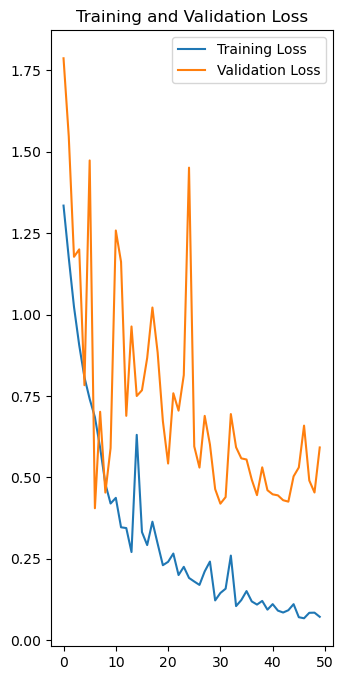

In [29]:

import matplotlib.pyplot as plt#
#acc = history.history['accuracy']
#val_acc = history.history['val_accuracy']
#epochs = 30
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
#plt.subplot(1, 2, 1)
#plt.plot(epochs_range, acc, label='Training Accuracy')
#plt.plot(epochs_range, val_acc, label='Validation Accuracy')
#plt.legend(loc='lower right')
#plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [30]:
best_model = tf.keras.models.load_model('best_model.h5')

In [31]:
best_model.evaluate(test_gen, batch_size=1, steps = 200)

200/200 [==============================] - 1s 2ms/step - loss: 1.4879 - mse: 1.4879 - mape: 343.1872


[1.4879268407821655, 1.4879268407821655, 343.18719482421875]

In [32]:
predict = best_model(np.expand_dims(X[-sequence_length:,:], axis=0))
predict

<tf.Tensor: shape=(1, 29), dtype=float32, numpy=
array([[0.26198095, 0.24531639, 0.48244053, 0.45903456, 0.5117753 ,
        0.5525303 , 0.75429523, 0.8552327 , 0.94896275, 1.1364454 ,
        1.0001097 , 1.278097  , 1.2588278 , 1.3540521 , 1.169711  ,
        1.3458335 , 0.9766908 , 0.9214295 , 1.0724821 , 0.84513766,
        0.8816822 , 1.1987575 , 1.2988166 , 1.5067182 , 1.3232943 ,
        1.2738163 , 1.1882706 , 1.2797499 , 1.1512958 ]], dtype=float32)>

In [33]:
result = scaler_y.inverse_transform(predict)
result

array([[7.35674412e+07, 7.32119540e+07, 7.82702685e+07, 7.77709741e+07,
        7.88960359e+07, 7.97654180e+07, 8.40694527e+07, 8.62226436e+07,
        8.82220856e+07, 9.22214516e+07, 8.93131480e+07, 9.52431536e+07,
        9.48321039e+07, 9.68634207e+07, 9.29310707e+07, 9.66881037e+07,
        8.88135790e+07, 8.76347487e+07, 9.08569914e+07, 8.60072965e+07,
        8.67868624e+07, 9.35506892e+07, 9.56851410e+07, 1.00120082e+08,
        9.62072979e+07, 9.51518383e+07, 9.33269822e+07, 9.52784118e+07,
        9.25382388e+07]])

In [34]:
submission = pd.read_csv('sample_submission.csv')
submission.iloc[:,1] = result[0,:]
submission.to_csv('submission_2.csv', index = False)

In [35]:
test = pd.read_csv('submission_2.csv')
test

,week,revenue
0,04.09.2023,7.356744e+07
1,11.09.2023,7.321195e+07
2,18.09.2023,7.827027e+07
3,25.09.2023,7.777097e+07
4,02.10.2023,7.889604e+07
5,09.10.2023,7.976542e+07
6,16.10.2023,8.406945e+07
7,23.10.2023,8.622264e+07
8,30.10.2023,8.822209e+07
9,06.11.2023,9.222145e+07
